In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")
target_names = ["a","b","c","d","e","f","g","h","i","k","l","m","n","o","p",
    "q","r","s","t","u","v","w","x","y"]
target_names = list(target_names)

print(train.shape)

labels = train['label'].values
labels_arr = np.array(labels)
print(len(np.unique(labels_arr)))

train.drop('label', axis=1, inplace=True)

images = train.values

images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

labels = LabelBinarizer().fit_transform(labels)
images = images.astype("float")/255.0
images = images.reshape(images.shape[0], 28, 28, 1)


X_train, X_val, y_train, y_val= train_test_split(images, labels, test_size = 0.3)

(27455, 785)
24


In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model


inputs = Input(shape=(28,28,1))

x = Conv2D(32, kernel_size=3, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)

x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(64, kernel_size=1, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(128, kernel_size=1, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(128, kernel_size=1, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(256, kernel_size=1, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(256, kernel_size=1, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

for i in range(5):
    x = DepthwiseConv2D(kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(512, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

x = DepthwiseConv2D(kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = Conv2D(1024, kernel_size=1, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)

x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(24, activation='softmax')(x)

model=Model(inputs,x)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])
model=model.fit(X_train,y_train,validation_data=(X_val, y_val), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
601/601 [==============================] - 67s 102ms/step - loss: 1.7736 - accuracy: 0.4569 - val_loss: 5.3996 - val_accuracy: 0.0404
Epoch 2/10
601/601 [==============================] - 65s 109ms/step - loss: 0.5088 - accuracy: 0.8423 - val_loss: 0.5648 - val_accuracy: 0.8304
Epoch 3/10
601/601 [==============================] - 66s 110ms/step - loss: 0.2862 - accuracy: 0.9171 - val_loss: 0.3193 - val_accuracy: 0.9108
Epoch 4/10
601/601 [==============================] - 152s 252ms/step - loss: 0.2091 - accuracy: 0.9454 - val_loss: 0.9067 - val_accuracy: 0.7675
Epoch 5/10
601/601 [==============================] - 154s 257ms/step - loss: 0.1840 - accuracy: 0.9548 - val_loss: 0.2138 - val_accuracy: 0.9382
Epoch 6/10
601/601 [==============================] - 131s 219ms/step - loss: 0.1514 - accuracy: 0.9615 - val_loss: 0.2038 - val_accuracy: 0.9483
Epoch 7/10
601/601 [==============================] - 72s 119ms/step - loss: 0.1410 - accuracy: 0.9656 - val_loss: 1.0023 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


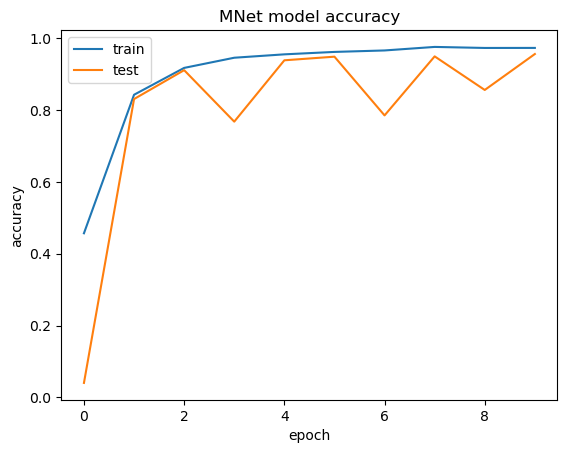

In [19]:
import matplotlib.pyplot as plt
import numpy as np
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('MNet model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

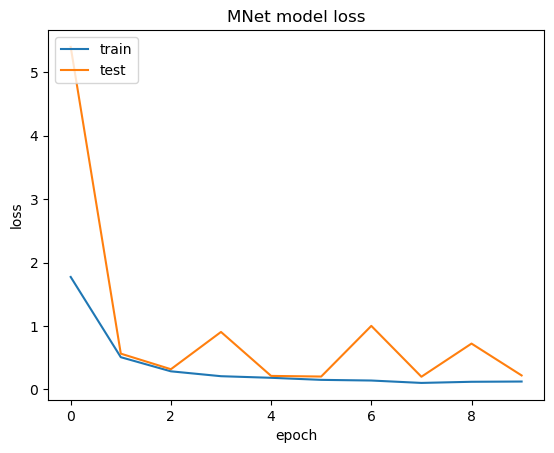

In [18]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('MNet model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()